# Binary Companion 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20

(-1.5, 1.5)

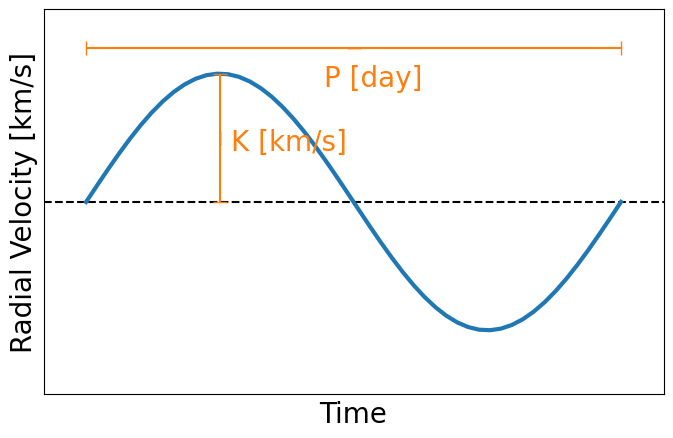

In [2]:
xx = np.linspace(0, 2*np.pi)
yy = np.sin(xx)
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.hlines(0, 0-0.5, 2*np.pi+0.5, linestyles="--", color="k")
ax.plot(xx, yy, lw=3)

ax.errorbar(.5*np.pi, 0.5, 0.5, 0, capsize=5, color="tab:orange", )
ax.text(1.7, 0.4, "K [km/s]", fontdict={"color":"tab:orange"})

ax.errorbar(np.pi, 1.2, 0, np.pi, capsize=5, color="tab:orange", )
ax.text(2.8, 0.9, "P [day]", fontdict={"color":"tab:orange"})

ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel("Radial Velocity [km/s]")
ax.set_xlabel("Time")
ax.set_xlim(0-0.5, 2*np.pi+0.5)
ax.set_ylim(-1.5, 1.5)


## Mass function

如果我们在观测一颗恒星，我们发现这颗恒星的视向速度有变化，趋势如上:
- 视向速度随时间的变化为正弦函数
- 半振幅为K [km/s]
- 周期为P [day]

假设:
- 可见星质量为 $m$
- 伴星质量为 $M$
- 以速度 $v$ 绕质心做圆周运动, 半径为 $R$ 
- 双星轨道平面倾角（平面法向量和视线方向的夹角）为$i$

回答以下问题：
1. 若已知这颗恒星的视向速度变化是由于其伴星引起的，求解伴星的质量的表达式？
2. 如果我们发现这颗恒星的视向速度半振幅 $K=50 \,\mathrm{km/s}$ ，$P=1 \,\mathrm{day}$，倾角$i=0^\circ$，求伴星质量？
3. 如果视向速度半振幅 $K=52.8 \,\mathrm{km/s}$ ，$P=78.9 \,\mathrm{day}$，倾角$i=16.5^\circ$ 呢？

## [Q0]

假设可见星质量为 $m$ ，以速度 $v$ 绕质心做圆周运动, 半径为 $R$ ，伴星质量为 $M$
- 万有引力定律：
$\dfrac{GmM}{R^2} = \dfrac{mv^2}{R^2}$ 
- 周期、速度和半径的关系
$P=\dfrac{2\pi R}{v}$

伴星质量 $M = \dfrac{v^2 R}{G} = \dfrac{Pv^3}{2 \pi G}$

其中，$v$ 与视向速度曲线的半振幅 $K$ 之间存在关系：$v=K/\sin{i}$, $i$为公转平面与视线方向的夹角（0度为face-on,90度为edge-on）

因此， $M=\dfrac{P K^3}{2 \pi G {\sin{i}}^3}$

In [3]:
import astropy.units as u
import astropy.constants as c

const = (1/(2*np.pi) * u.day * (u.km /u.s)**3 / c.G).to(u.Msun)
const

<Quantity 1.03614907e-07 solMass>

因此，M的近似公式为

$M =  \dfrac{P[\mathrm{day}] K[\mathrm{km/s}]^3}{{\sin{i}}^3} \times 1.036 \times 10^{-7} M_\odot$

## [Q1]

如果我们发现这颗恒星的视向速度半振幅 $K=50 \,\mathrm{km/s}$ ，$P=1 \,\mathrm{day}$，倾角$i=0^\circ$，求伴星质量？
 
$M = 1.036 \times 10^{-7} \times \dfrac{1 \times 50^3}{1^3} M_\odot$

In [4]:
const *50**3

<Quantity 0.01295186 solMass>

## [Q2]

如果视向速度半振幅 $K=52.8 \,\mathrm{km/s}$ ，$P=78.9 \,\mathrm{day}$，倾角$i=16.5^\circ$ 呢？
 
$M = 1.036 \times 10^{-7} \times \dfrac{78.9 \times 52.8^3}{{\sin{16.5^\circ}}^3} M_\odot$

In [5]:
const *78.9*52.8**3 / np.sin(np.deg2rad(16.5))**3

<Quantity 52.52615332 solMass>